<a href="https://colab.research.google.com/github/meshachaderele/first-ml-model/blob/main/Machine_Learning_Web_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of Machine Learning

Machine learning is a branch of artificial intelligence that empowers computers to learn from data and make decisions or predictions without being explicitly programmed. It's like teaching a computer to recognize patterns and make decisions based on examples. At its core, machine learning involves algorithms that iteratively learn from data, uncovering hidden insights and making predictions or decisions.

# The Problem

**Case Study:**
Standardizing Timber Product Pricing for a Forestry Company

**Background:**
You have recently joined a Forestry company as a Forest Product Officer. The company faces a significant challenge in establishing a standardized method for pricing its timber products. This inconsistency in pricing has led to confusion and inefficiencies within the company's operations.

**Objective:**
Your task is to develop a comprehensive strategy to address the pricing inconsistency issue and establish a standardized pricing framework for the company's timber products.

# Load the Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the data

data = pd.read_csv('https://raw.githubusercontent.com/meshachaderele/timber-price/main/timber_price_data.csv')


# Explore the Data

In [2]:
# Exploratory Data Analysis
data.head()

,DBH,Height,Age,Species,Soil_Type,Latitude,Longitude,Timber Price
0,14.363503,26.661964,28,Pine,Clay,44.564462,-79.028632,24.035257
1,28.767858,58.771085,7,Pine,Loam,42.828441,-77.763995,54.914123
2,23.299849,88.565125,35,Oak,Sandy,40.913362,-75.850894,80.324099
3,19.966462,75.900240,28,Pine,Loam,40.697994,-76.726373,66.916136
4,8.900466,82.590503,14,Pine,Clay,42.882362,-77.943980,62.046827


In [3]:
data.describe()

,DBH,Height,Age,Latitude,Longitude,Timber Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,17.256414,55.631557,25.449000,42.417738,-77.559317,47.977563
std,7.303434,26.297090,14.137371,1.461463,1.429284,22.263013
min,5.115801,10.289644,1.000000,40.000933,-79.989617,-5.201397
25%,10.899332,31.696684,13.000000,41.161832,-78.799620,29.944778
50%,17.420184,56.686052,25.000000,42.359944,-77.563509,48.392506
75%,23.607990,78.441855,38.000000,43.701678,-76.330902,66.171573
max,29.992942,99.947235,49.000000,44.988114,-75.004753,98.130540


In [4]:
data.isna().any()

DBH             False
Height          False
Age             False
Species         False
Soil_Type       False
Latitude        False
Longitude       False
Timber Price    False
dtype: bool

In [5]:
data.columns

Index(['DBH', 'Height', 'Age', 'Species', 'Soil_Type', 'Latitude', 'Longitude',
       'Timber Price'],
      dtype='object')

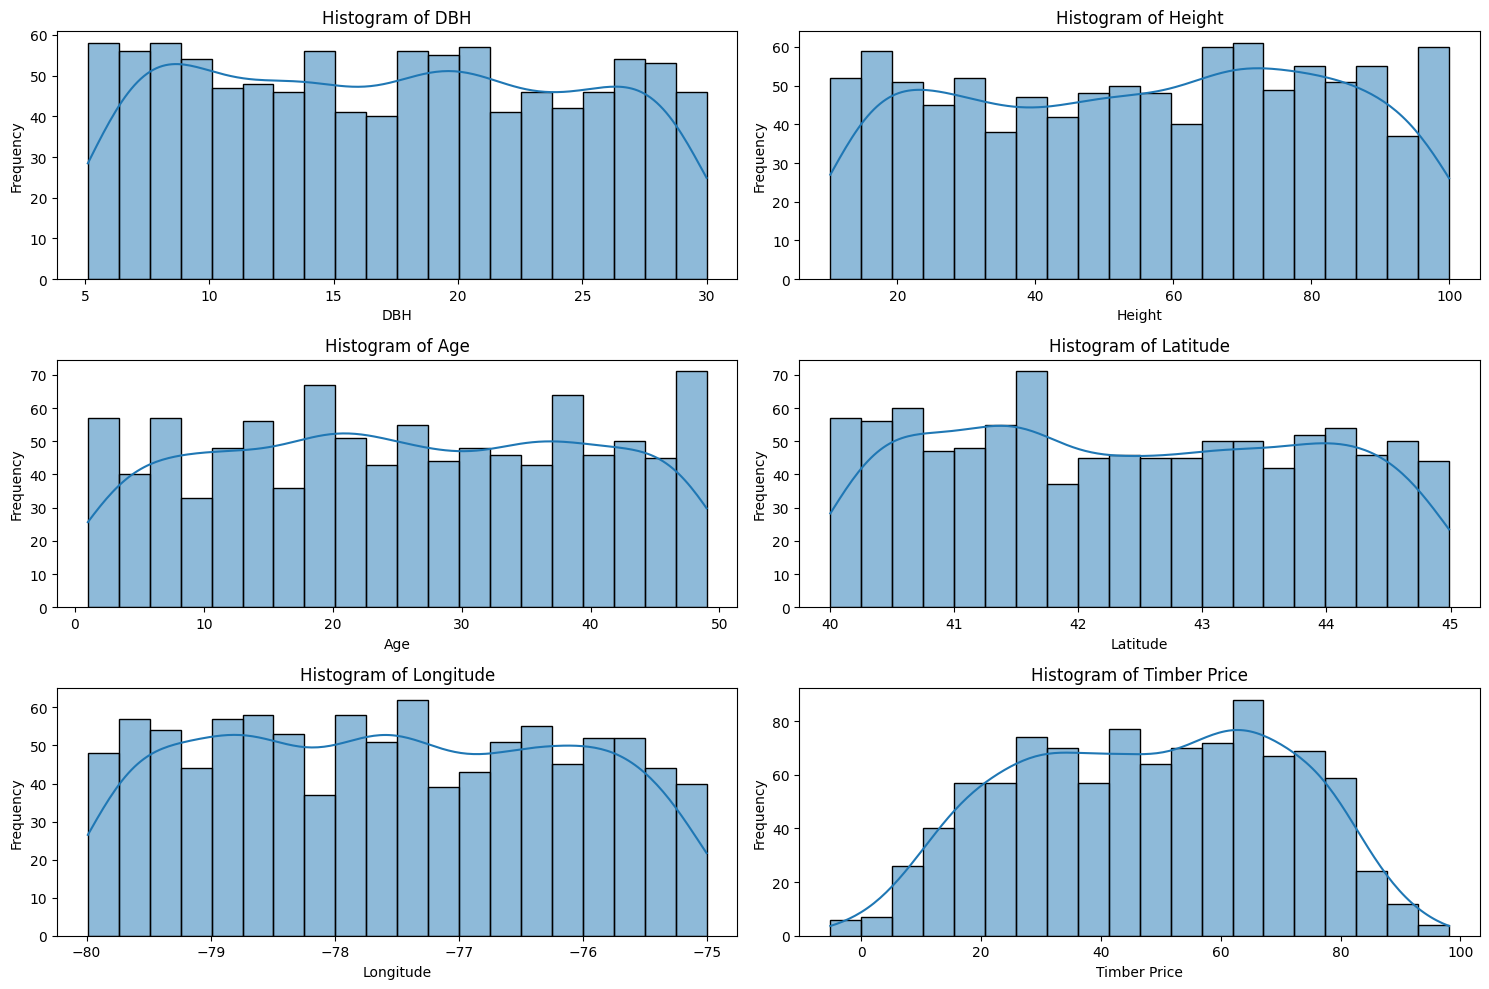

In [6]:
import seaborn as sns

variables = ['DBH', 'Height', 'Age', 'Latitude', 'Longitude', 'Timber Price']

# Plot histograms for each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

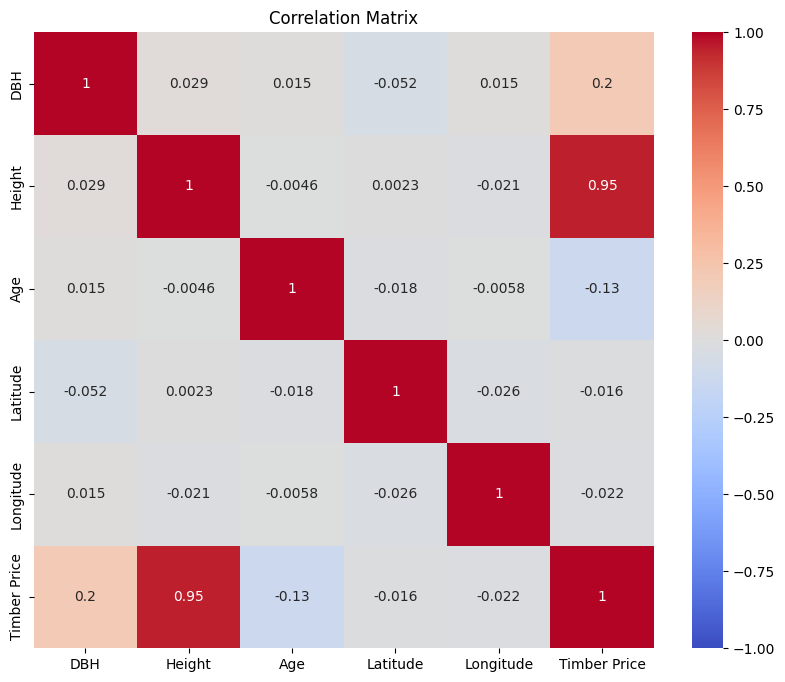

In [7]:
# Check for correlation

import matplotlib.pyplot as plt

correlation_matrix = data.drop(['Species', 'Soil_Type'], axis = 1).corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing for Modeling

In [8]:

# Splitting data into features (X) and target variable (y)
X = data[['DBH', 'Height', 'Age', 'Species', 'Soil_Type', 'Latitude', 'Longitude']]
y = data['Timber Price']



In [9]:
# Encoding categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical features to be one-hot encoded
cat_features = ['Species', 'Soil_Type']

# Preprocessing pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features)
    ], remainder='passthrough'
)



In [10]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model Training and Testing

In [11]:
# Load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Species', 'Soil_Type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [12]:
# Model Evaluation
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Squared Error (MSE): 30.49309149540545
Root Mean Squared Error (RMSE): 5.52205500655376
R² Score: 0.93954075370458


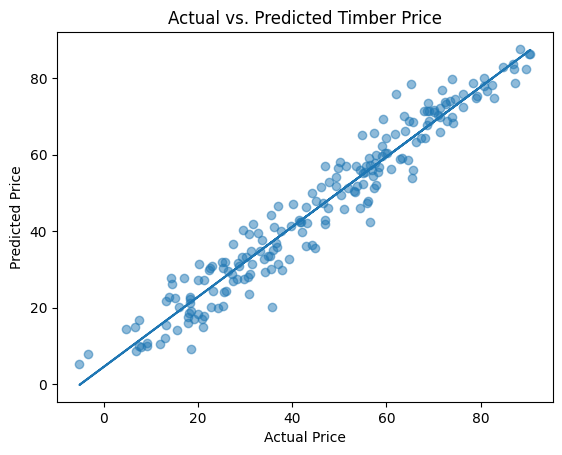

In [13]:
# Visualize predicted vs. actual price
from scipy import stats

plt.scatter(y_test, y_pred, alpha=0.5)

slope, intercept, rvalue, pvalue, stderr = stats.linregress(y_test,y_pred)

plt.plot(y_test,slope*y_test+intercept)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Timber Price")
plt.show()

# Make Predictions With the Trained Model

In [14]:

pred_data = pd.read_csv('https://raw.githubusercontent.com/meshachaderele/timber-price/main/timber_price_val_data.csv')


In [15]:
pred_data.head()

,DBH,Height,Age,Species,Soil_Type,Latitude,Longitude
0,15.425550,11.743026,21,Spruce,Loam,43.675330,-77.110714
1,23.008112,71.095198,49,Oak,Sandy,43.860890,-79.079949
2,5.002859,29.046530,23,Oak,Loam,44.539079,-76.060354
3,12.558314,33.899199,38,Oak,Sandy,44.659860,-76.939844
4,8.668897,54.241584,14,Maple,Sandy,40.069758,-79.730454


In [16]:
# Make the prediction
timber_price_predict = pipeline.predict(pred_data)

In [17]:
#Join the prediction to table
pred_data['Timber Price'] = timber_price_predict
pred_data.head()

,DBH,Height,Age,Species,Soil_Type,Latitude,Longitude,Timber Price
0,15.425550,11.743026,21,Spruce,Loam,43.675330,-77.110714,11.302516
1,23.008112,71.095198,49,Oak,Sandy,43.860890,-79.079949,59.601265
2,5.002859,29.046530,23,Oak,Loam,44.539079,-76.060354,19.685513
3,12.558314,33.899199,38,Oak,Sandy,44.659860,-76.939844,30.890208
4,8.668897,54.241584,14,Maple,Sandy,40.069758,-79.730454,45.511434


# Deploy Model into a Web Application

In [18]:
import joblib

# Save the pipeline model
joblib.dump(pipeline, 'timber_price_model.joblib')

['timber_price_model.joblib']

In [ ]:
!pip install streamlit

In [21]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('timber_price_model.joblib')

def predict_price(features):
    # Convert input dictionary to DataFrame
    input_data = pd.DataFrame([features])
    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

def main():
    st.title('Timber Price Prediction App')
    st.write('Enter the following details to predict Timber Price:')

    # Input fields
    dbh = st.number_input('Diameter at Breast Height (DBH)', min_value=0.1, step=0.1)
    height = st.number_input('Height (in feet)', min_value=1.0, step=1.0)
    age = st.number_input('Age (in years)', min_value=1, step=1)
    species = st.selectbox('Species', ['Pine', 'Oak', 'Maple', 'Spruce'])
    soil_type = st.selectbox('Soil Type', ['Sandy', 'Clay', 'Loam'])
    latitude = st.number_input('Latitude', min_value=-90.0, max_value=90.0, step=0.001)
    longitude = st.number_input('Longitude', min_value=-180.0, max_value=180.0, step=0.001)

    # Create a dictionary from user inputs
    features = {
        'DBH': dbh,
        'Height': height,
        'Age': age,
        'Species': species,
        'Soil_Type': soil_type,
        'Latitude': latitude,
        'Longitude': longitude
    }

    # Predict Timber Price
    if st.button('Predict'):
        prediction = predict_price(features)
        st.success(f'Predicted Timber Price: ${prediction:.2f}')

if __name__ == '__main__':
    main()


Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com
! streamlit run app.py & npx localtunnel --port 8501


34.125.197.159



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.197.159:8501

npx: installed 22 in 4.978s
your url is: https://thin-papers-learn.loca.lt
